In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv(r"/Users/kartikeya/Documents/ML:AI:DL Projects/loan prediction.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:

df.drop(['Loan_ID'],axis=1,inplace=True)


In [11]:
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 7


In [12]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',  'Property_Area', 'Loan_Status']
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']



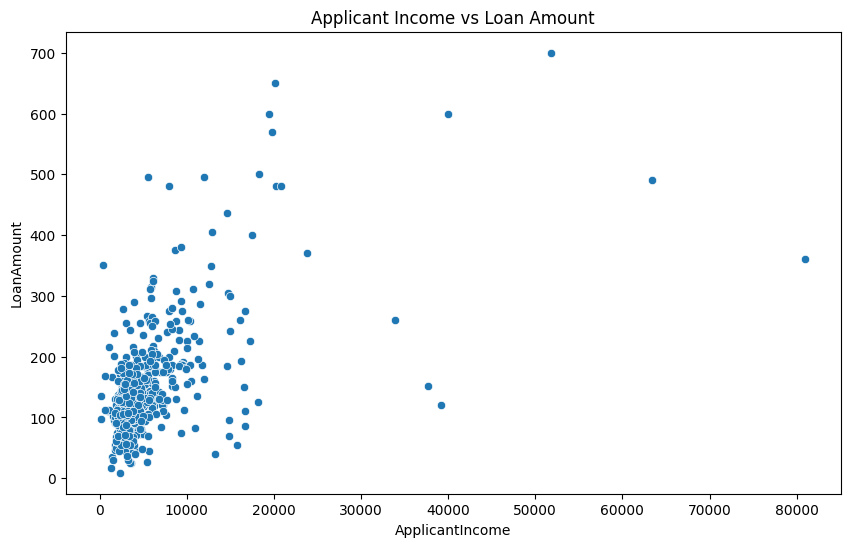

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Applicant Income vs Loan Amount')
plt.show()

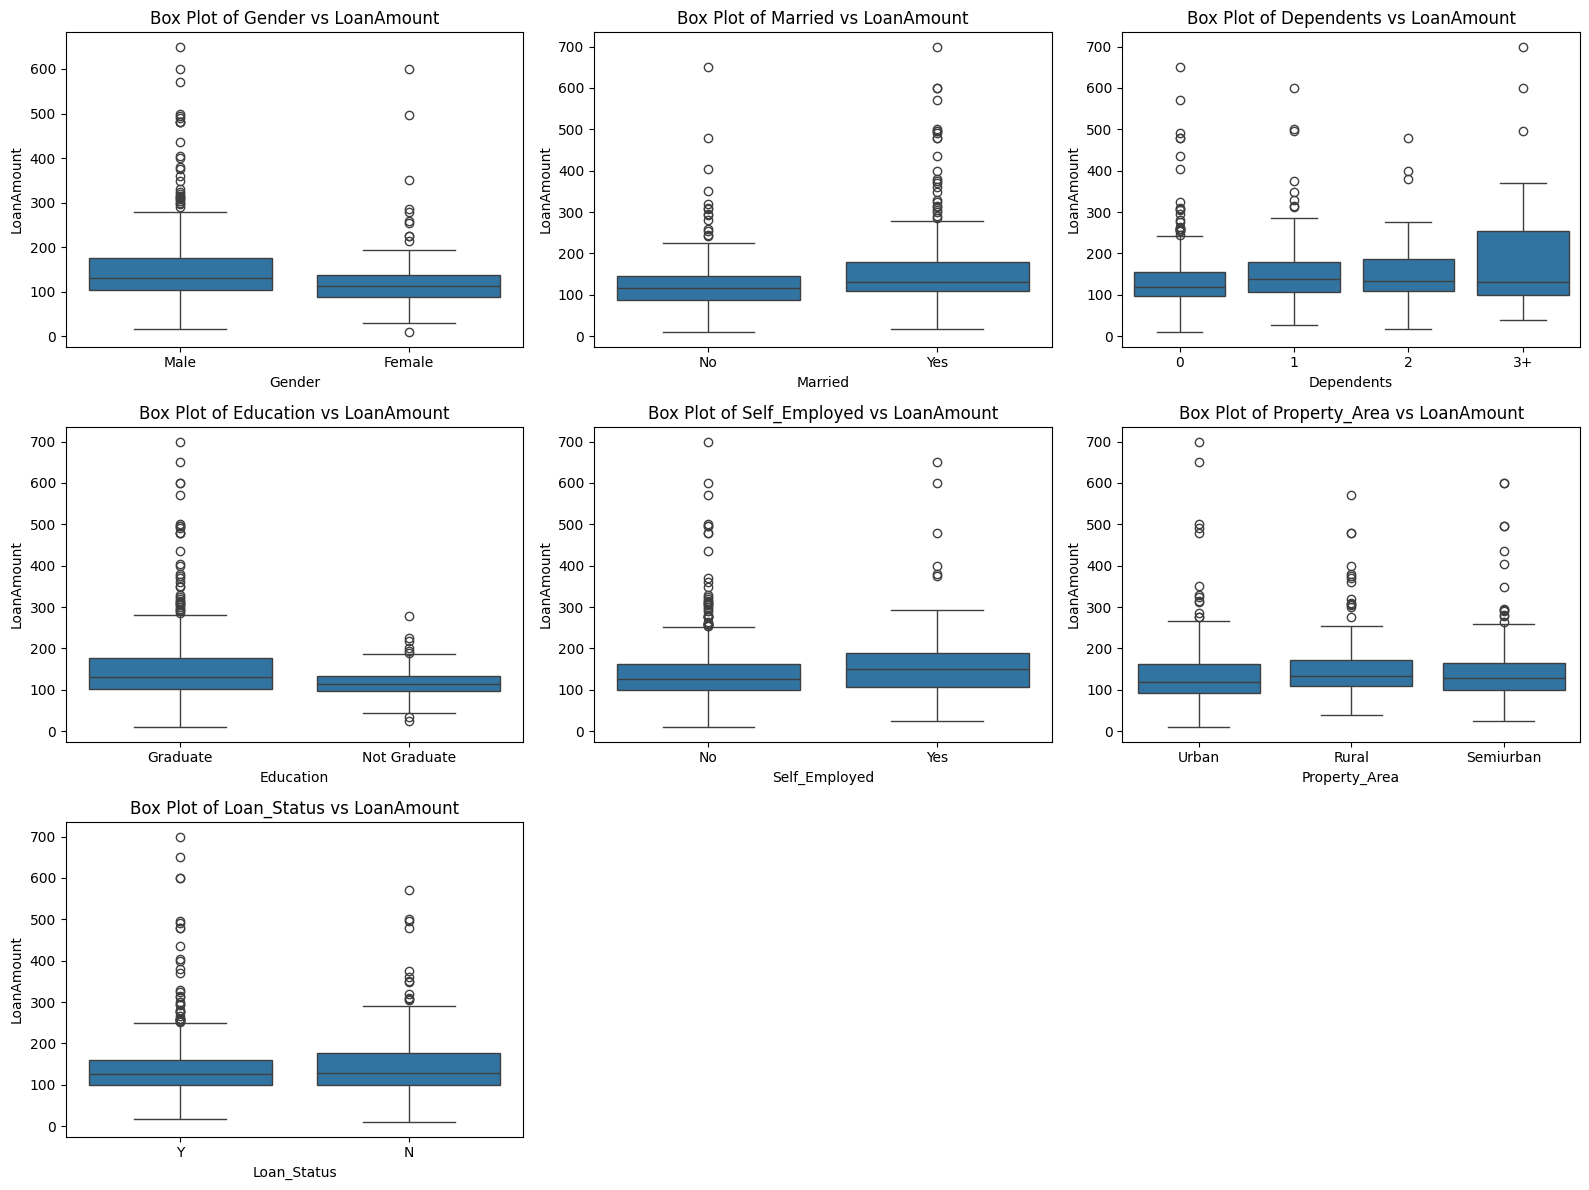

In [14]:
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=feature, y='LoanAmount', data=df)
    plt.title(f'Box Plot of {feature} vs LoanAmount')

plt.tight_layout()
plt.show()

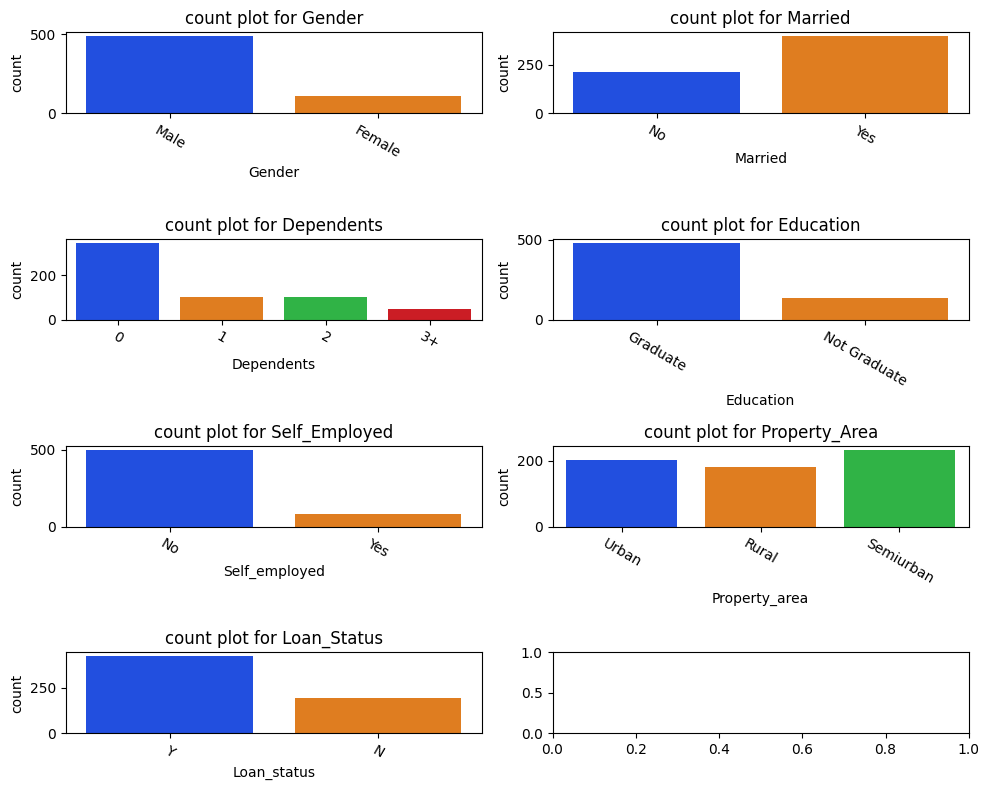

In [15]:
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize=(10,8))
axes=axes.ravel()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column],data=df, palette='bright' , ax=axes[i])
    axes[i].set_title(f"count plot for {column}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = -30)
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('count')
    
plt.tight_layout()
plt.show()


In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:

from sklearn import preprocessing 
	

label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
  df[col] = label_encoder.fit_transform(df[col])


<Axes: >

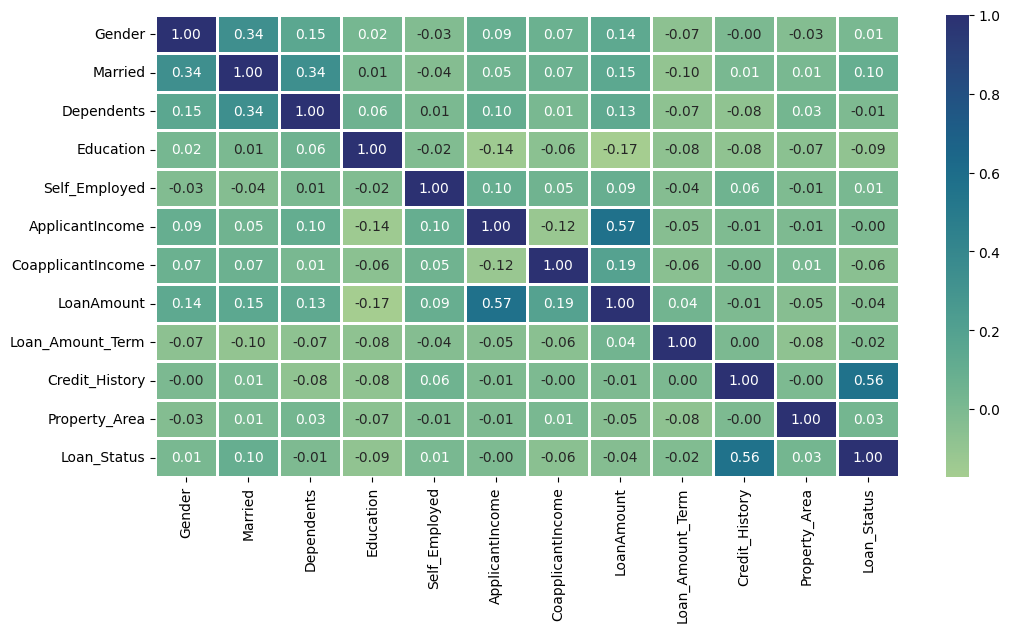

In [18]:
plt.figure(figsize=(12,6)) 

sns.heatmap(df.corr(),cmap='crest',fmt='.2f', 
			linewidths=2,annot=True)


In [19]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.137736,-0.068536,-0.000515,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.148922,-0.097345,0.010690,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.134371,-0.074783,-0.079801,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.091348,-0.037492,0.056894,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.010522,-0.059187
LoanAmount,0.137736,0.148922,0.134371,-0.171133,0.091348,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.045792,-0.037318
Loan_Amount_Term,-0.068536,-0.097345,-0.074783,-0.078784,-0.037492,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.078748,-0.021268
Credit_History,-0.000515,0.010690,-0.079801,-0.081822,0.056894,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.001969,0.561678


In [20]:
df[numerical].corr()['LoanAmount']

ApplicantIncome      0.570909
CoapplicantIncome    0.188619
LoanAmount           1.000000
Loan_Amount_Term     0.039447
Credit_History      -0.008433
Name: LoanAmount, dtype: float64

In [21]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',  'Property_Area', 'Loan_Status']

for col in categorical_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Gender': [1 0 2]
Unique values in 'Married': [0 1 2]
Unique values in 'Dependents': [0 1 2 3 4]
Unique values in 'Education': [0 1]
Unique values in 'Self_Employed': [0 1 2]
Unique values in 'Property_Area': [2 0 1]
Unique values in 'Loan_Status': [1 0]


In [22]:

obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


In [23]:
for col in df.columns: 
   df[col] = df[col].fillna(df[col].mean()) 
	
df.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [25]:
from sklearn.model_selection import train_test_split 

X = df.drop(['Loan_Status'],axis=1) 
Y = df['Loan_Status'] 


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [32]:

from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics 


rfc = RandomForestClassifier(n_estimators = 7, 
							criterion = 'entropy', 
							random_state =7) 


rfc.fit(X_train, Y_train)


dump(rfc, 'model/loan_rfc_model.pkl')





['model/loan_rfc_model.pkl']